In [1]:
# pip install yfinance

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [105]:
import yfinance as yf

In [106]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20, end.month, end.day)

In [107]:
stock = "^NSEI"
google_data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [108]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0


In [109]:
google_data.shape

(4160, 6)

In [110]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4160.000000,4160.000000,4160.000000,4160.000000,4160.000000,4.160000e+03
mean,9846.089363,9899.537140,9777.030678,9839.961288,9839.961288,2.036433e+05
std,5233.366492,5246.178417,5212.039967,5230.755987,5230.755987,2.096892e+05
min,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.000000e+00
25%,5565.437622,5605.712646,5518.274902,5560.612305,5560.612305,0.000000e+00
50%,8388.550293,8428.649902,8332.725098,8373.200195,8373.200195,1.754000e+05
75%,11904.600098,11946.350098,11823.262695,11895.700195,11895.700195,2.844250e+05
max,25333.599609,25333.650391,25235.800781,25279.849609,25279.849609,1.811000e+06


In [111]:
google_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4160 entries, 2007-09-17 to 2024-09-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4160 non-null   float64
 1   High       4160 non-null   float64
 2   Low        4160 non-null   float64
 3   Close      4160 non-null   float64
 4   Adj Close  4160 non-null   float64
 5   Volume     4160 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 227.5 KB


In [112]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Closing price of Google data')

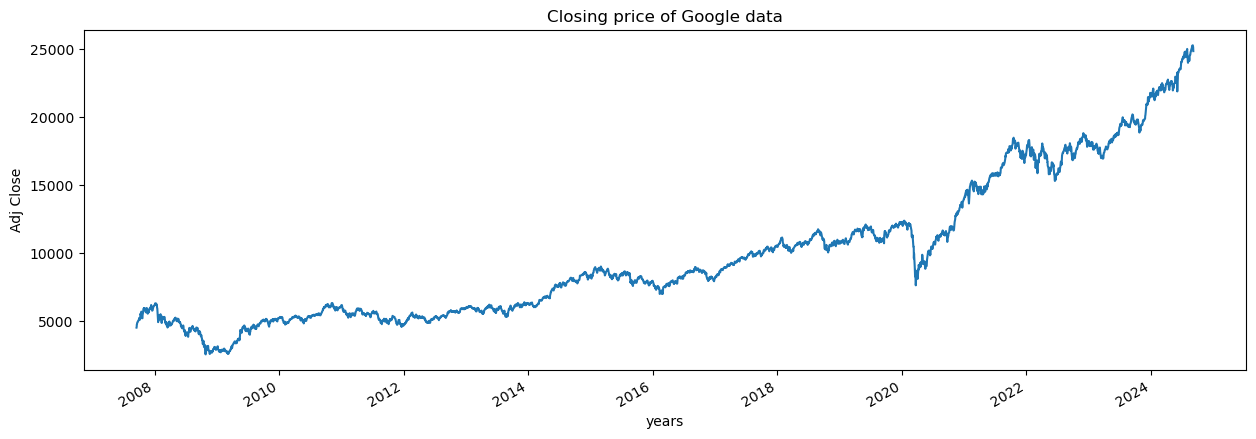

In [114]:
plt.figure(figsize = (15,5))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing price of Google data")

In [115]:
def plot_graph(figsize, values, column_name):
    plt.figure()
    values.plot(figsize = figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")
    

In [116]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

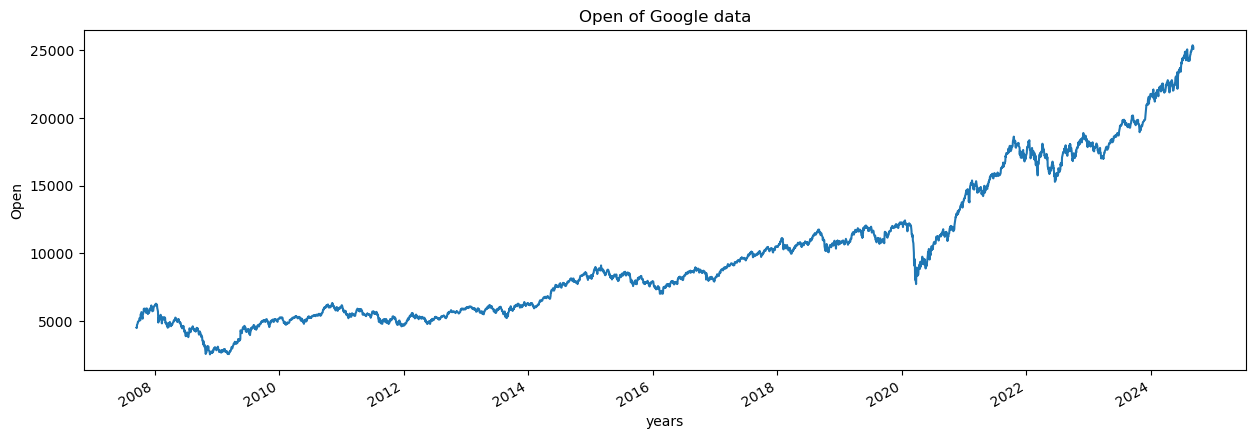

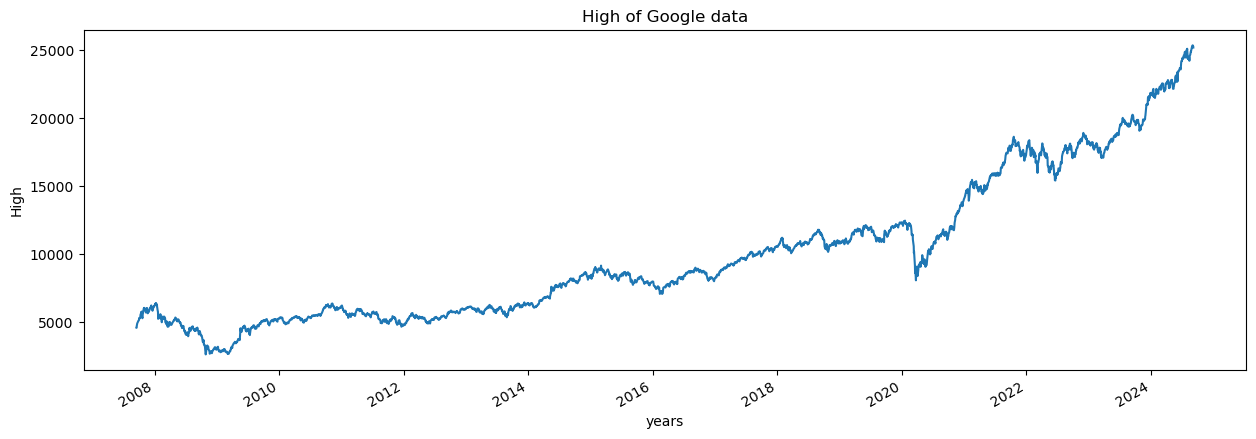

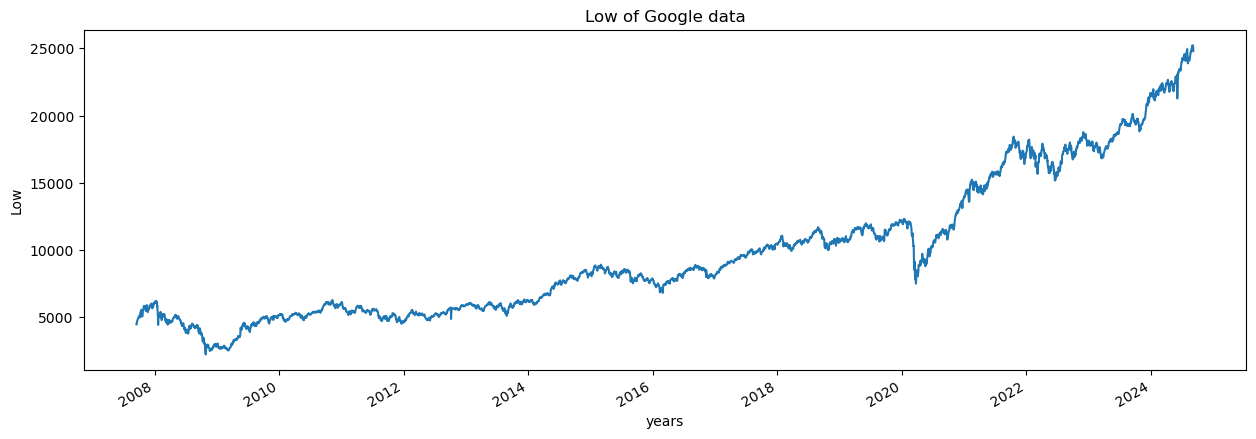

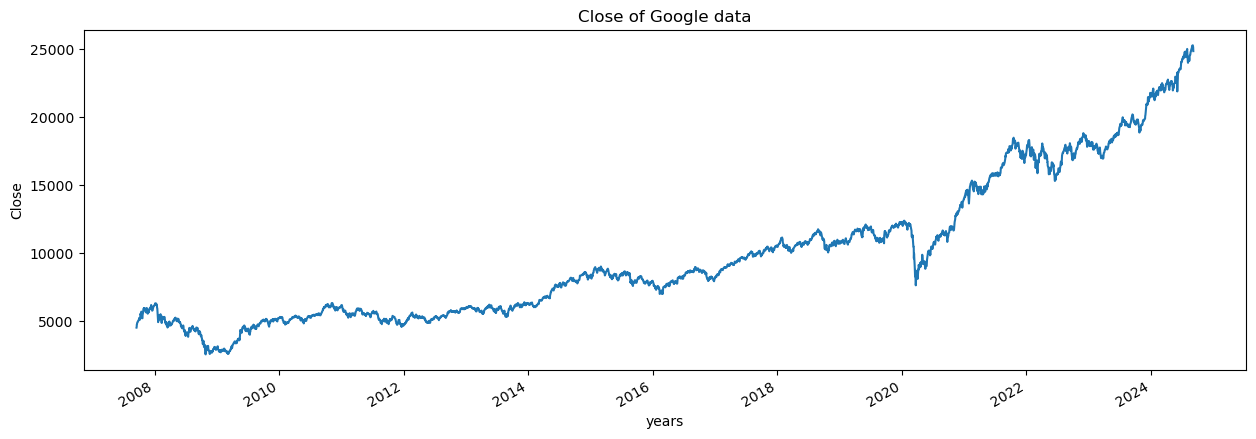

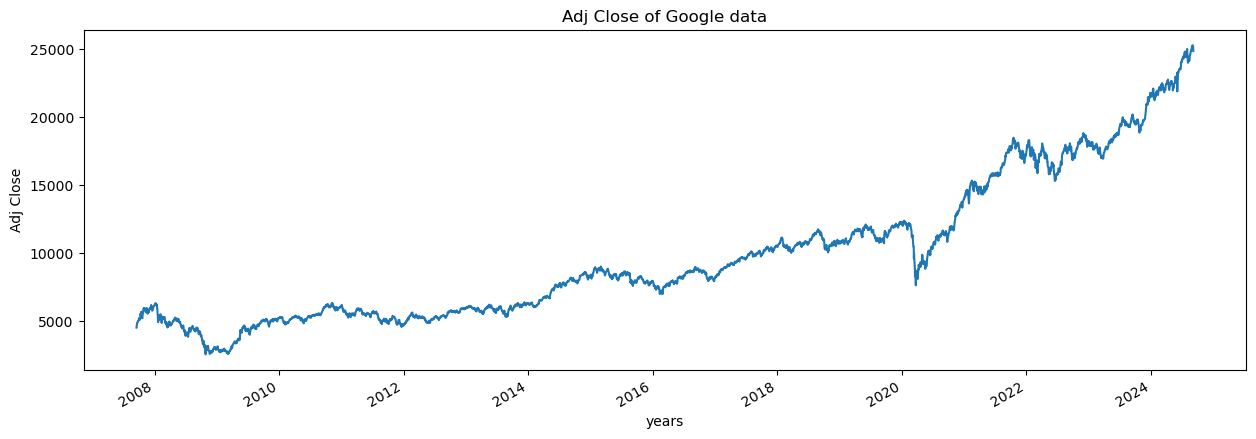

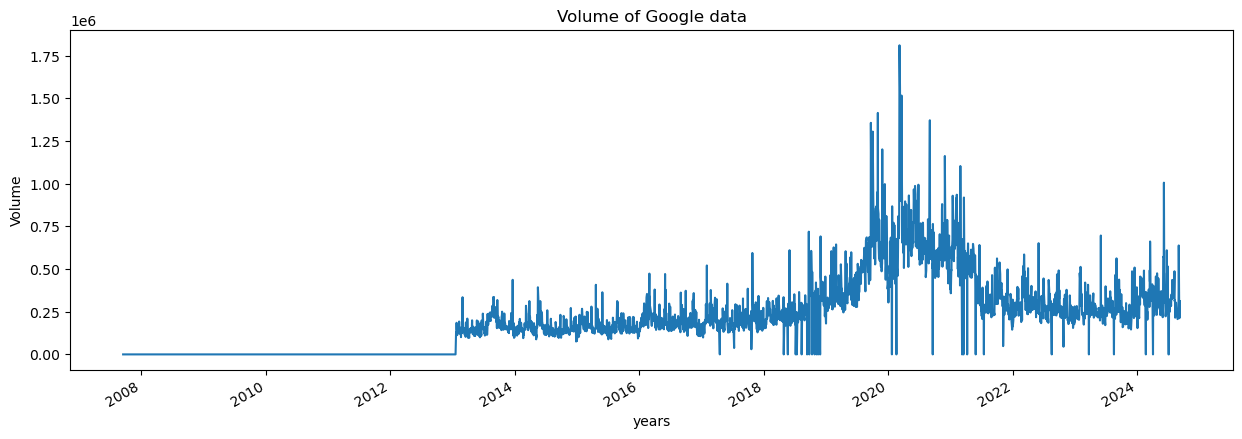

In [117]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column], column)

In [118]:
# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA for 5 days ==> null null null null 30 40 50 60 70 80

In [119]:
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_data[1:6])/5)

40.0


In [120]:
import pandas as pd
data = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
data.head()

,0
0,10
1,20
2,30
3,40
4,50


In [121]:
data['MA'] = data.rolling(5).mean()
data

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [123]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 0
2005 0
2006 0
2007 72
2008 245
2009 241
2010 250
2011 242
2012 242
2013 247
2014 240
2015 244
2016 244
2017 248
2018 245
2019 241
2020 250
2021 248
2022 248
2023 245
2024 168


In [130]:
google_data['MA_for_250_days'] = google_data['Adj Close'].rolling(25).mean()

In [131]:
google_data['MA_for_250_days'][0:9].tail()

Date
2007-09-21   NaN
2007-09-24   NaN
2007-09-25   NaN
2007-09-26   NaN
2007-09-27   NaN
Name: MA_for_250_days, dtype: float64

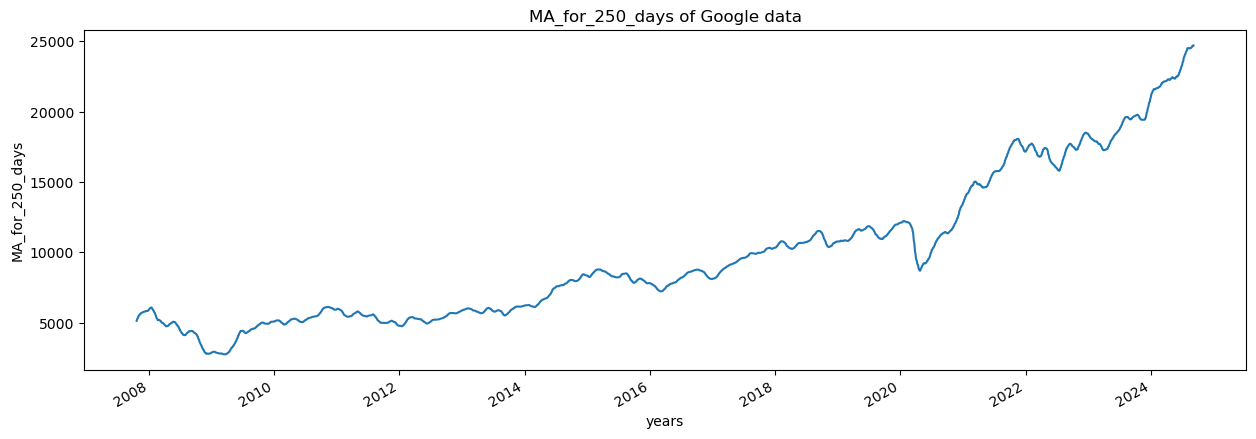

In [132]:
plot_graph((15,5), google_data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

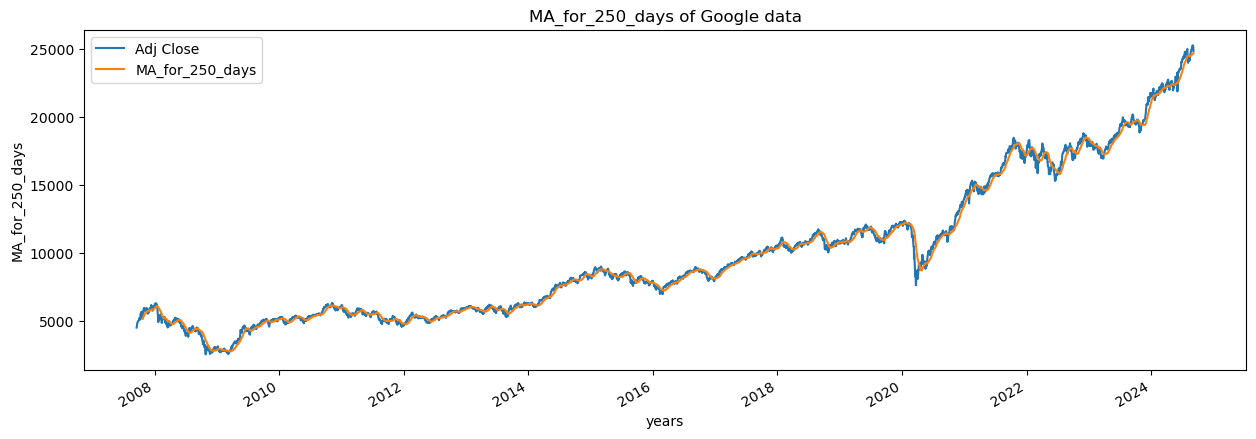

In [133]:
plot_graph((15,5), google_data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

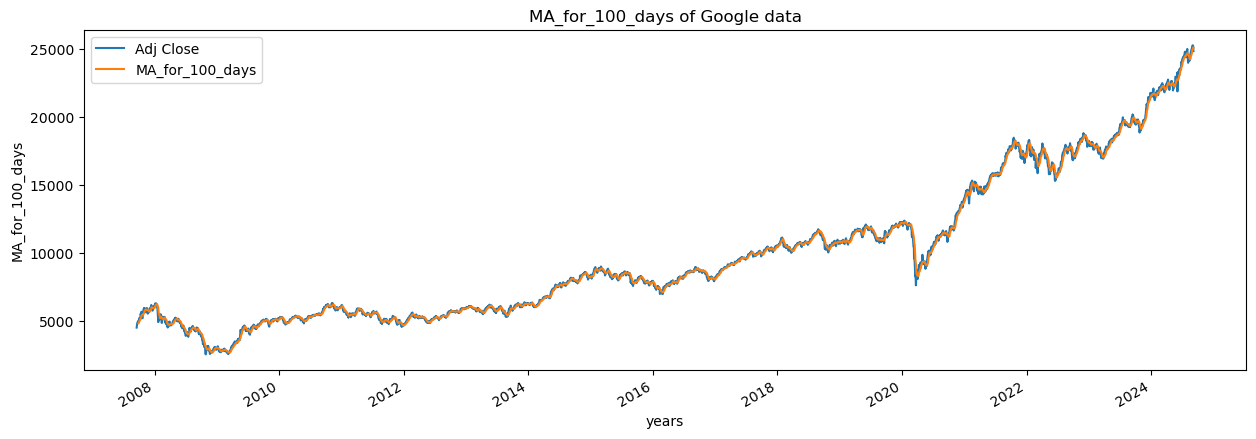

In [134]:
google_data['MA_for_100_days'] = google_data['Adj Close'].rolling(10).mean()
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

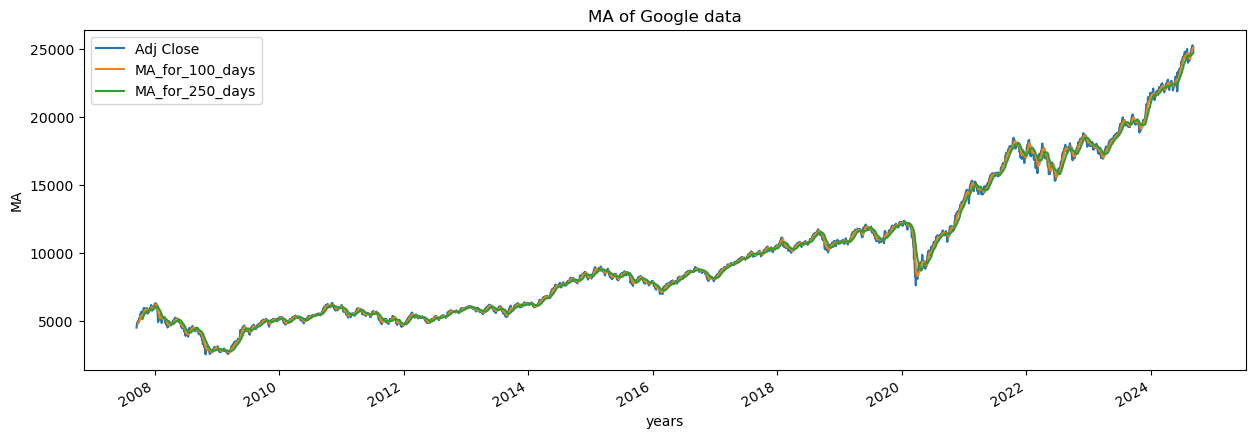

In [135]:
plot_graph((15,5), google_data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [136]:
google_data['percentage_change_cp'] = google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()

,Adj Close,percentage_change_cp
Date,,
2007-09-17,4494.649902,NaN
2007-09-18,4546.200195,0.011469
2007-09-19,4732.350098,0.040946
2007-09-20,4747.549805,0.003212
2007-09-21,4837.549805,0.018957


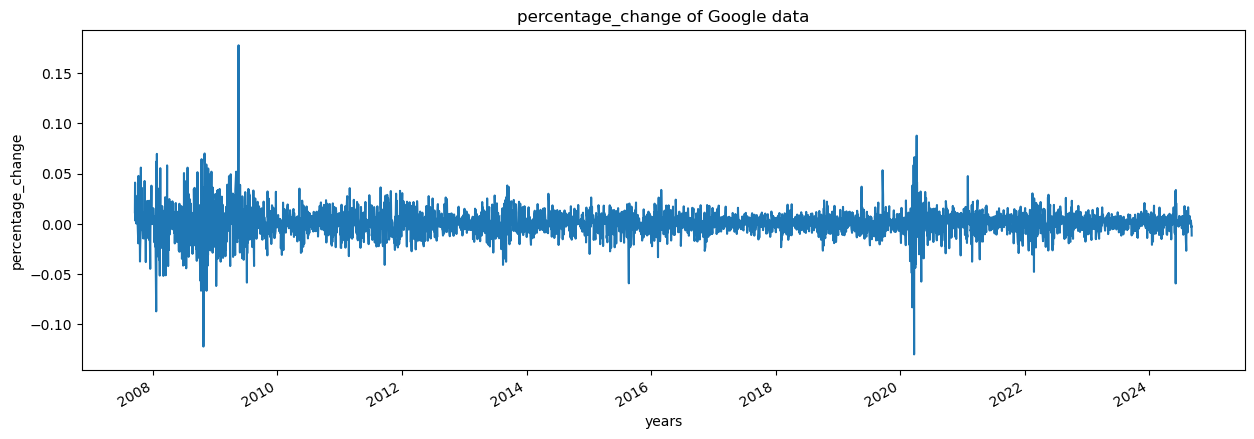

In [137]:
plot_graph((15,5), google_data['percentage_change_cp'], 'percentage_change')

In [138]:
Adj_close_price = google_data[['Adj Close']]

In [139]:
max(Adj_close_price.values),min(Adj_close_price.values) 

(array([25279.84960938]), array([2524.19995117]))

In [140]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[0.08659168],
       [0.08885707],
       [0.09703745],
       ...,
       [0.99643384],
       [0.99407839],
       [0.9812047 ]])

In [141]:
len(scaled_data)

4160

In [142]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])
    
import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [143]:
x_data[0],y_data[0]

(array([[0.08659168],
        [0.08885707],
        [0.09703745],
        [0.0977054 ],
        [0.10166046],
        [0.10581989],
        [0.10611212],
        [0.10618462],
        [0.10882352],
        [0.10973759],
        [0.11182938],
        [0.11806298],
        [0.1179685 ],
        [0.11696656],
        [0.11253909],
        [0.1231804 ],
        [0.12819894],
        [0.13186396],
        [0.12761886],
        [0.13826017],
        [0.13815689],
        [0.13337786],
        [0.1242241 ],
        [0.11826073],
        [0.11688526],
        [0.12961617],
        [0.13060273],
        [0.13380195],
        [0.13966201],
        [0.14860925],
        [0.14697669],
        [0.14837853],
        [0.14687562],
        [0.14977379],
        [0.14603406],
        [0.1433622 ],
        [0.14317983],
        [0.13950602],
        [0.1359179 ],
        [0.1393588 ],
        [0.15001549],
        [0.14888171],
        [0.148651  ],
        [0.14868615],
        [0.14311611],
        [0

In [144]:

int(len(x_data)*0.7)

2842

In [145]:
4908-100-int(len(x_data)*0.7)

1966

In [146]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [147]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2842, 100, 1)
(2842, 1)
(1218, 100, 1)
(1218, 1)


In [148]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [149]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\chinm\anaconda3\envs\PT\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [150]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [151]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
2842/2842 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - loss: 3.9984e-04
Epoch 2/2
2842/2842 ━━━━━━━━━━━━━━━━━━━━ 85s 30ms/step - loss: 1.0740e-04


In [152]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [153]:
predictions = model.predict(x_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


In [154]:
predictions

array([[0.39860302],
       [0.39619094],
       [0.3925142 ],
       ...,
       [1.0012369 ],
       [1.0004344 ],
       [0.998824  ]], dtype=float32)

In [155]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[11594.67 ],
       [11539.781],
       [11456.115],
       ...,
       [25307.996],
       [25289.734],
       [25253.088]], dtype=float32)

In [156]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[11314.        ],
       [11174.75      ],
       [11126.40039062],
       ...,
       [25198.69921875],
       [25145.09960938],
       [24852.15039062]])

In [157]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))

In [158]:
rmse

279.14670442254584

In [159]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2019-10-03,11314.000000,11594.669922
2019-10-04,11174.750000,11539.781250
2019-10-07,11126.400391,11456.115234
2019-10-09,11313.299805,11387.033203
2019-10-10,11234.549805,11429.308594


<Figure size 640x480 with 0 Axes>

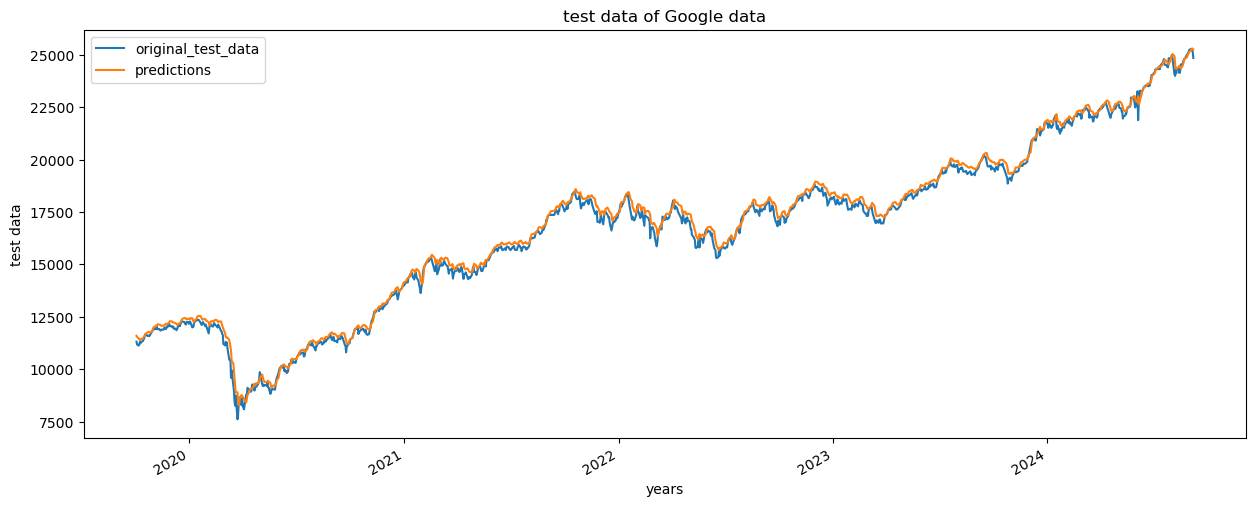

In [160]:
plot_graph((15,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

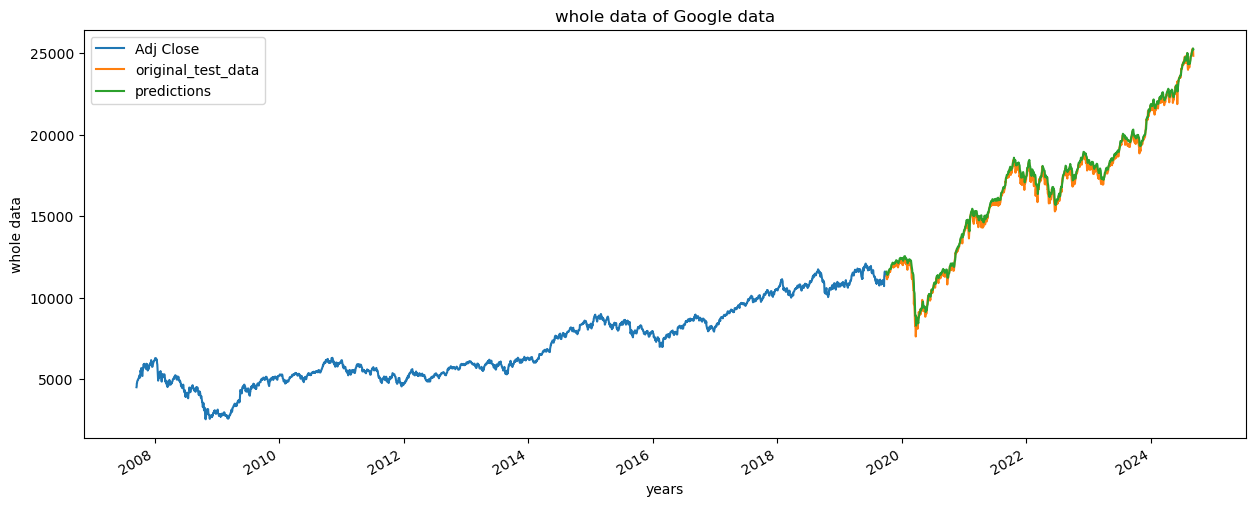

In [161]:
plot_graph((15,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [162]:
model.save("Latest_NIFTY_price_model_daily.keras")